# Mapping Chicago's Crime Patterns: Insights from Two Decades of Data

## Executive Summary

This project analyzes reported crime data in Chicago from 2001 through May 2024, with the goal of identifying trends and patterns that could inform strategies for crime prevention and public safety efforts.

### Key Findings

- The overall crime rate in Chicago had been decreasing since 2003, but has started increasing again over the past 3 years, with 2023 seeing the highest number of reported crimes since the COVID-19 pandemic.

- July and August tend to have the highest crime rates, while February has the lowest. Crime peaks in the evening hours between 6pm-12am.

- The Chicago Lawn (8th) and Near North Side (8th) districts experience the highest crime rates, while Lincoln (20th district) has the lowest.

- Austin (area 25) and Near North Side (area 8) neighborhoods have the highest concentration of reported crimes.

- The most common crimes reported are theft, battery, criminal damage, and narcotics-related offenses. 

- Only around 19% of reported domestic violence incidents result in arrests, compared to higher arrest rates for crimes like prostitution and gambling.

- Street locations have the highest prevalence of reported crimes, followed by residences and apartments.

- Time-series forecasting indicates the crime rate will likely rise over the next few months before declining towards the end of 2024.

Moving forward, the analysis recommends focusing crime prevention resources in the highest-risk districts, neighborhoods and location types identified. It also suggests exploring factors behind lower arrest rates for certain crimes like domestic violence. Predictive modeling can further assist in allocating resources proactively.

## Project Description



To conduct a comprehensive analysis of reported crime data in Chicago from 2001 through May 2024, with the aim of uncovering underlying trends, patterns, and insights that can inform crime prevention strategies and the optimal allocation of public safety resources.

This in-depth analysis seeks to provide data-driven recommendations to help law enforcement agencies and city officials:

1. Identify high-risk areas, times, and types of crimes that require heightened focus and intervention efforts.

2. Understand factors that may contribute to lower arrest rates for certain crimes like domestic violence, and explore potential remedies.

3. Leverage predictive modeling techniques to forecast future crime patterns and allocate resources proactively in an efficient manner.

4. Tailor crime prevention programs and community outreach initiatives to address the unique needs and challenges of different neighborhoods and districts.

5. Develop targeted strategies to combat the most prevalent types of crimes, such as theft, battery, criminal damage, and narcotics-related offenses.

6. Optimize the deployment of law enforcement personnel and resources based on temporal patterns, peak crime hours, and seasonal fluctuations.

By harnessing the power of data analysis on this extensive crime dataset, this project aims to provide actionable insights that can enhance public safety, foster community trust, and create a more secure environment for the residents of Chicago.

## Sidebar and Data Sources

I performed an extensive data analysis on the Chicago Police Department's reported crime incidents dataset spanning from 2001 to May 2024. This comprehensive dataset encompasses a wide range of attributes, including case numbers, dates, location details (block addresses, community areas, coordinates), crime types (IUCR codes, primary descriptions), arrest information, domestic violence indicators, and more.

The primary objective of this analysis was to uncover meaningful patterns, trends, and insights that could aid law enforcement agencies, city officials, and community organizations in developing effective strategies to enhance public safety and allocate resources optimally.

Please note that specific identifiable details, such as victim or perpetrator names, have been intentionally omitted from this report to protect personal privacy and maintain confidentiality, in accordance with data privacy regulations and ethical standards.

Unless otherwise stated, the primary data source utilized for this analysis is:

Chicago Police Department Reported Crime Incidents (2001 - May 2024):  
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Additional supplementary data sources referenced include:

Boundaries - Police Districts (current):  
https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r

Chicago Police District and Beats:  
https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf

## Summary of Key Findings

#### Key Finding #1

The overall crime rate in Chicago had been decreasing since 2003, but has started rising again over the past 3 years, with 2023 seeing the highest number of reported crimes since the COVID-19 pandemic.

#### Key Finding #2

Crime rates tend to peak during the summer months of July and August, as well as in the evening hours between 6pm and 12am, highlighting the need for increased surveillance and patrol during these high-risk periods.

#### Key Finding #3

Geographic analysis indicates that certain districts, such as the 8th District (Chicago Lawn), have significantly higher crime rates compared to others, like the 20th District (Lincoln). This highlights the importance of district-specific strategies for crime prevention and community safety.

#### Key Finding #4

The most prevalent types of crimes reported are theft, battery, criminal damage, and narcotics-related offenses, suggesting the need for targeted prevention and enforcement efforts.

#### Key Finding #5

Only around 19% of reported domestic violence incidents result in arrests, compared to higher arrest rates for crimes like prostitution and gambling, pointing to potential areas for improvement in law enforcement response and victim support services.

#### Key Finding #6

Street locations have the highest prevalence of reported crimes, followed by residences and apartments, indicating the importance of community policing and collaboration with residents.

#### Key Finding #7

Time-series forecasting models predict that the crime rate in Chicago is likely to rise over the next few months before declining towards the end of 2024, allowing for proactive resource allocation and preparedness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import folium
from folium.plugins import HeatMap

In [2]:
df=pd.read_csv('Crimes_-_2001_to_Present_20240519.csv')
df.head(2)

ID Case Number                    Date                Block  IUCR  \
0  5741943    HN549294  08/25/2007 09:22:18 AM   074XX N ROGERS AVE  0560   
1    25953    JE240540  05/24/2021 03:06:00 PM  020XX N LARAMIE AVE  0110   

  Primary Type          Description Location Description  Arrest  Domestic  \
0      ASSAULT               SIMPLE                OTHER   False     False   
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   

   ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0  ...  49.0             1.0       08A           NaN          NaN  2007   
1  ...  36.0            19.0       01A     1141387.0    1913179.0  2021   

               Updated On   Latitude  Longitude                       Location  
0  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
1  11/18/2023 03:39:49 PM  41.917838 -87.755969  (41.917838056, -87.755968972)  

[2 rows x 22 columns]

In [3]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df.describe()

ID                           Date          Beat  \
count  8.062679e+06                        8062679  8.062679e+06   
mean   7.240032e+06  2010-11-27 01:45:50.010004224  1.185042e+03   
min    6.340000e+02            2001-01-01 00:00:00  1.110000e+02   
25%    3.896242e+06     2005-03-27 20:54:36.500000  6.210000e+02   
50%    7.235206e+06            2009-11-13 14:40:00  1.034000e+03   
75%    1.048305e+07            2016-04-02 10:54:30  1.731000e+03   
max    1.346430e+07            2024-05-11 00:00:00  2.535000e+03   
std    3.624623e+06                            NaN  7.035062e+02   

           District          Ward  Community Area  X Coordinate  Y Coordinate  \
count  8.062632e+06  7.447833e+06    7.449209e+06  7.973889e+06  7.973889e+06   
mean   1.129748e+01  2.276859e+01    3.743461e+01  1.164619e+06  1.885844e+06   
min    1.000000e+00  1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.000000e+00  1.000000e+01    2.300000e+01  1.153010e+06  1.859115e+06   
50%    1.000000e+01  2.300000e+01    3.200000e+01  1.166150e+06  1.890824e+06   
75%    1.700000e+01  3.400000e+01    5.700000e+01  1.176389e+06  1.909357e+06   
max    3.100000e+01  5.000000e+01    7.700000e+01  1.205119e+06  1.951622e+06   
std    6.958654e+00  1.385505e+01    2.154576e+01  1.698400e+04  3.247441e+04   

               Year      Latitude     Longitude  
count  8.062679e+06  7.973889e+06  7.973889e+06  
mean   2.010403e+03  4.184235e+01 -8.767142e+01  
min    2.001000e+03  3.661945e+01 -9.168657e+01  
25%    2.005000e+03  4.176879e+01 -8.771354e+01  
50%    2.009000e+03  4.185611e+01 -8.766573e+01  
75%    2.016000e+03  4.190696e+01 -8.762812e+01  
max    2.024000e+03  4.202291e+01 -8.752453e+01  
std    6.615916e+00  8.935012e-02  6.153508e-02

In [7]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13016
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88790
Y Coordinate             88790
Year                         0
Updated On                   0
Latitude                 88790
Longitude                88790
Location                 88790
dtype: int64

<Axes: >

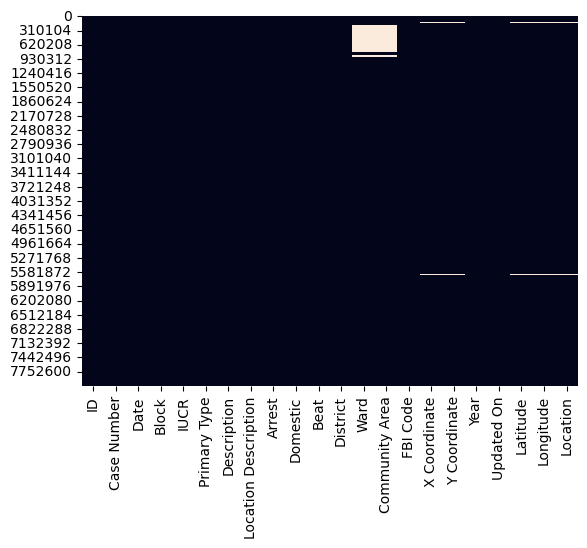

In [8]:
sns.heatmap(data=df.isnull(), cbar=False)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Checking the shape of the data

In [12]:
df.shape
print(f'Shape of the data: {df.shape}')
print(f'There are {df.shape[0]} rows in the data and {df.shape[1]} columns.')

Shape of the data: (7358831, 22)
There are 7358831 rows in the data and 22 columns.


### Creating a randomized sample from the dataset
A dataset with 7,358,831 rows is huge and for certain types of analysis, it could give us computational challenges.  

In those cases, we will use a randomized sample dataset. Instead of using "df" we will use "rdf".

For a population size of 7,358,831 and a desired margin of error of 1% with a confidence level of 95%, let's calculate the minimum recommended sample size.

In [18]:
import math

def calculate_sample_size(N, confidence_level=0.95, margin_of_error=0.05, proportion=0.5):
    # Z-scores for confidence levels
    z_scores = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    # Get the Z-score for the specified confidence level
    Z = z_scores[confidence_level]
    
    # Calculate the initial sample size (n_0)
    p = proportion
    E = margin_of_error
    n_0 = (Z**2 * p * (1 - p)) / (E**2)
    
    # Adjust for finite population
    n = n_0 / (1 + (n_0 - 1) / N)
    
    return math.ceil(n)

# Population size
N = 7358831

# Calculate the sample size for different confidence levels and margin of errors
confidence_level = 0.95
margin_of_error = 0.01

sample_size = calculate_sample_size(N, confidence_level, margin_of_error)

In [19]:
round(sample_size)

9592

In [20]:
# To get 9592 random rows
sample_crime_dataset = df.sample(n=9592)
sample_crime_dataset.to_csv('Chicago_Reported_Crimes (2001-May 2024).csv', index=False)

In [21]:
rdf = pd.read_csv('Chicago_Reported_Crimes (2001-May 2024).csv')
rdf.head(2)

ID Case Number                 Date               Block  IUCR  \
0  9834407    HX484278  2014-10-27 10:00:00  043XX W MADISON ST  0870   
1  5399619    HN245541  2007-03-24 22:21:00  064XX W WARNER AVE  2825   

    Primary Type              Description Location Description  Arrest  \
0          THEFT           POCKET-PICKING              CTA BUS   False   
1  OTHER OFFENSE  HARASSMENT BY TELEPHONE            RESIDENCE   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0     False  ...  28.0            26.0        06     1147559.0    1899663.0   
1     False  ...  38.0            17.0        26     1132530.0    1927139.0   

   Year              Updated On   Latitude  Longitude  \
0  2014  02/10/2018 03:50:01 PM  41.880632 -87.733640   
1  2007  02/28/2018 03:56:25 PM  41.956305 -87.788184   

                        Location  
0  (41.880632459, -87.733639652)  
1  (41.956304902, -87.788184395)  

[2 rows x 22 columns]

#### How has the crime rate changed over the years?

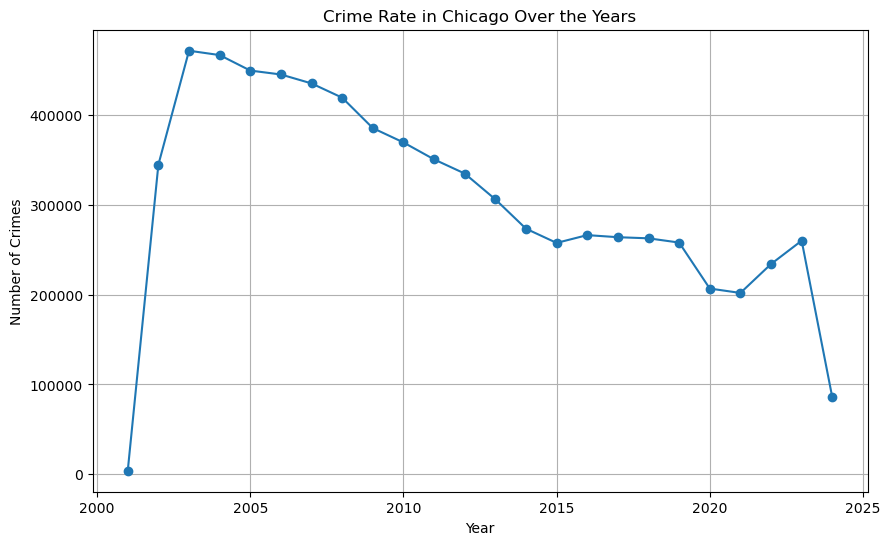

In [12]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year
# Group by 'Year' and count the number of crimes
crimes_per_year = df.groupby('Year').size()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o')
plt.title('Crime Rate in Chicago Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

The crime rate in Chicago had been on a general downward trend since 2003, but started going back up again in the last three years.

#### Are there specific months or seasons with higher crime rates?

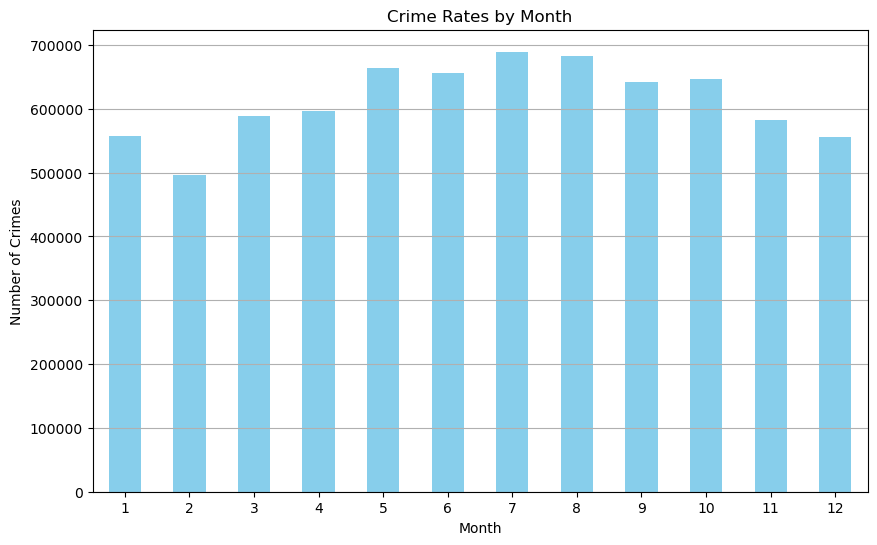

In [13]:
# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Month' and count the number of crimes
crimes_per_month = df.groupby('Month').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Crime Rates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

July has the highest number of crimes followed closely by August and May. February records the least number of crimes.

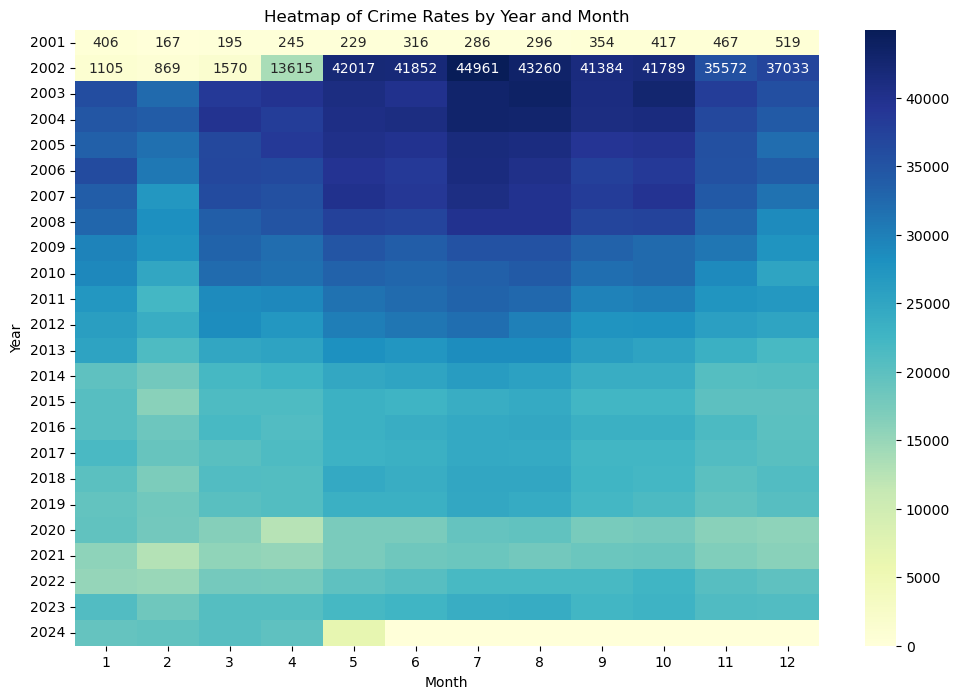

In [14]:
# Create a pivot table with 'Year' as rows and 'Month' as columns
crime_pivot = df.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Crime Rates by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

The heatmap shows how the crime rate in Chicago has been decreasing over the last two decades and how it has strated to rise in the last three years.

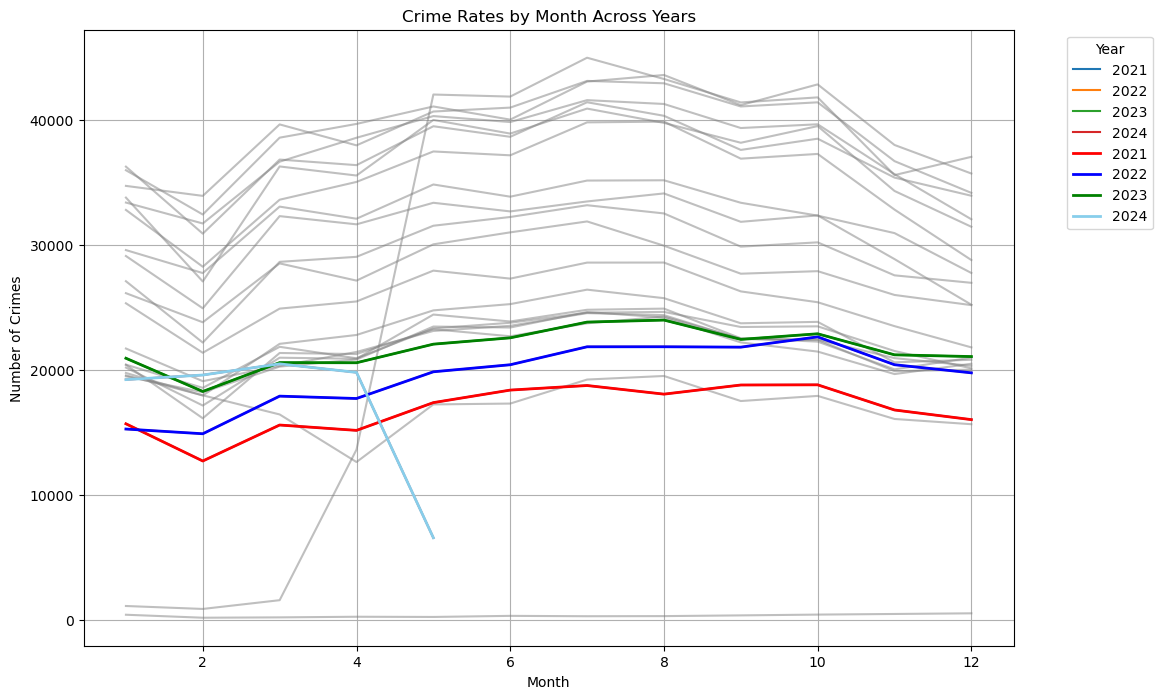

In [15]:
# Group by 'Year' and 'Month' and count the number of crimes
crime_per_month_year = df.groupby(['Year', 'Month']).size().unstack()

# Determine the last four years in the dataset
last_four_years = crime_per_month_year.index[-4:]

# Plot the line chart
plt.figure(figsize=(12, 8))
for year in crime_per_month_year.index:
    if year in last_four_years:
        plt.plot(crime_per_month_year.columns, crime_per_month_year.loc[year], label=year)
    else:
        plt.plot(crime_per_month_year.columns, crime_per_month_year.loc[year], color='gray', alpha=0.5)

# Highlight the last four years with distinct colors
colors = ['red', 'blue', 'green', 'skyblue']
for year, color in zip(last_four_years, colors):
    plt.plot(crime_per_month_year.columns, crime_per_month_year.loc[year], label=f'{year}', color=color, linewidth=2)

plt.title('Crime Rates by Month Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

2023 recorded the highest crime rate since the COVID 19 pandemic of 2020.  
The crime rate in 2023 was higher than in 2022 while the crime rate in 2022 was higher than in 2021.  
So far in 2024, the crime rate is in tandem with that of the same period last year.

#### What times of day have the highest crime rates?

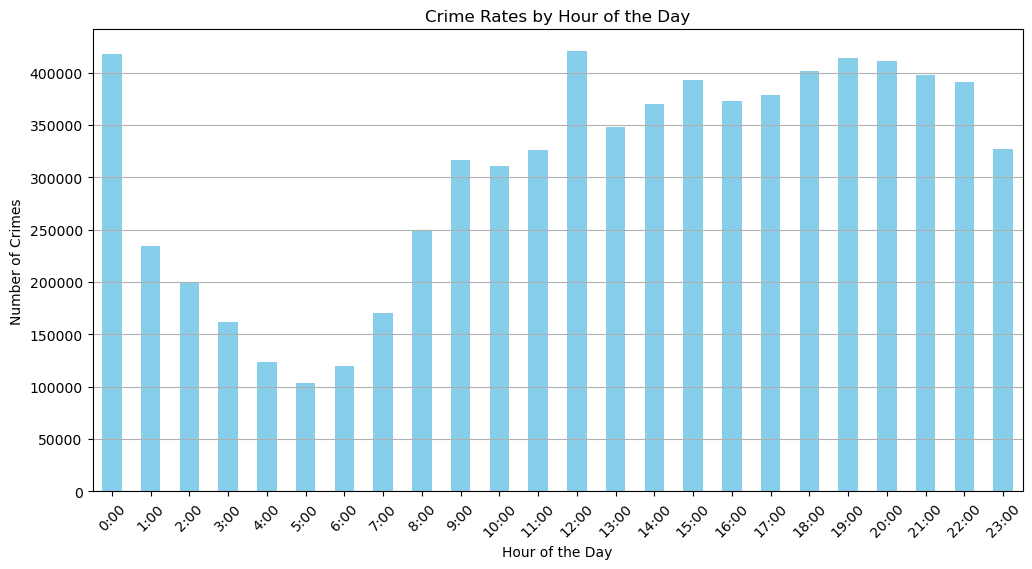

In [16]:
# Extract the hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Group by 'Hour' and count the number of crimes
crimes_per_hour = df.groupby('Hour').size()

# Plot the bar chart
plt.figure(figsize=(12, 6))
crimes_per_hour.plot(kind='bar', color='skyblue')
plt.title('Crime Rates by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)], rotation=45)
plt.grid(axis='y')
plt.show()

Most crimes in Chicago are committed at noon, midnight, and between 6pm and 8pm.  
Early morning hours of between 4am and 6am record the least number of crimes.

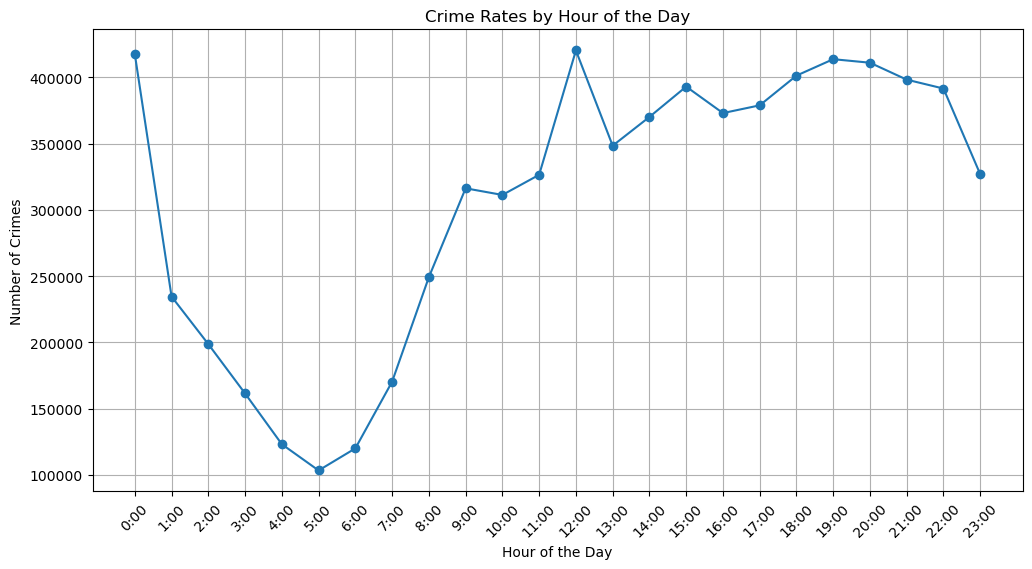

In [17]:
# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(crimes_per_hour.index, crimes_per_hour.values, marker='o', linestyle='-')
plt.title('Crime Rates by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24), labels=[f'{hour}:00' for hour in range(24)], rotation=45)
plt.grid(True)
plt.show()

#### Which districts have the highest crime rates?

In [18]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Hour'],
      dtype='object')

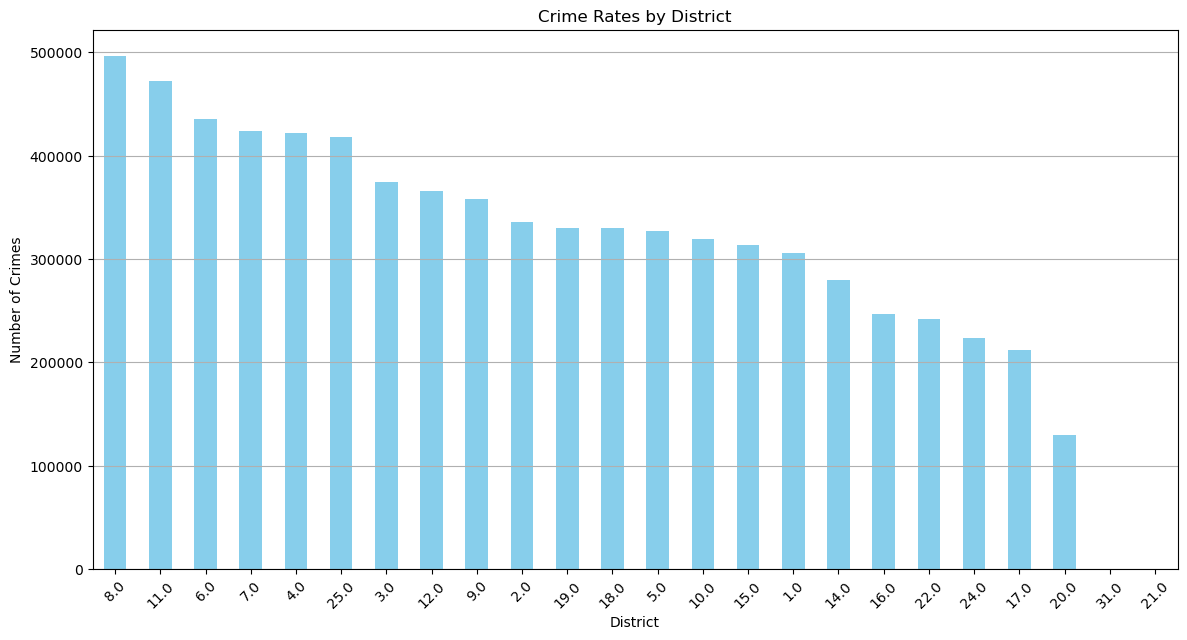

In [19]:
# Group by 'District' and count the number of crimes
crimes_per_district = df.groupby('District').size().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 7))
crimes_per_district.plot(kind='bar', color='skyblue')
plt.title('Crime Rates by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Chicago Lawn (8th District) has the highest crime rate in Chicago while Lincoln (20th District) has the lowest.

#### Are there specific blocks or locations that are crime hotspots?

We create a scatter map overlaid on a map of Chicago to show the geographic distribution of crimes, pinpointing specific hotspots.  
We will use the randomized dataset sample.

In [24]:
# Create a base map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add points to the map
for index, row in rdf.iterrows():
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=1,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Display the map
m.save('crime_hotspots.html')
m

#### How does crime distribution vary across different neighborhoods?

In [21]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Month', 'Hour'],
      dtype='object')

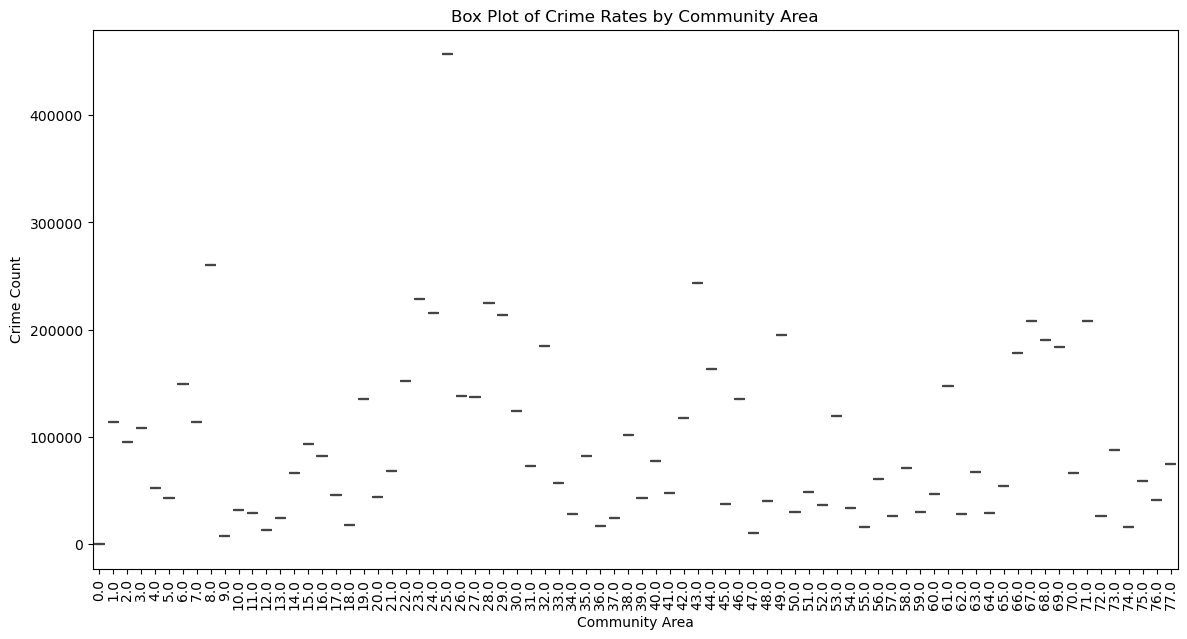

In [27]:
# Group by 'Community Area' and count the number of crimes
crime_per_community_area = df.groupby('Community Area').size().reset_index(name='Crime Count')

# Plot the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Community Area', y='Crime Count', data=crime_per_community_area)
plt.title('Box Plot of Crime Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.show()

Austin (Community area 25) has had the highest number of reported crimes in the last two decades followed by Near North Side (Community area 8) and South Shore(Community area 43).  
Edison Park (Community area 9) and Burnside (Community area 47) have the lowest reported crimes in Chicago.

#### What are the most common types of crimes reported?

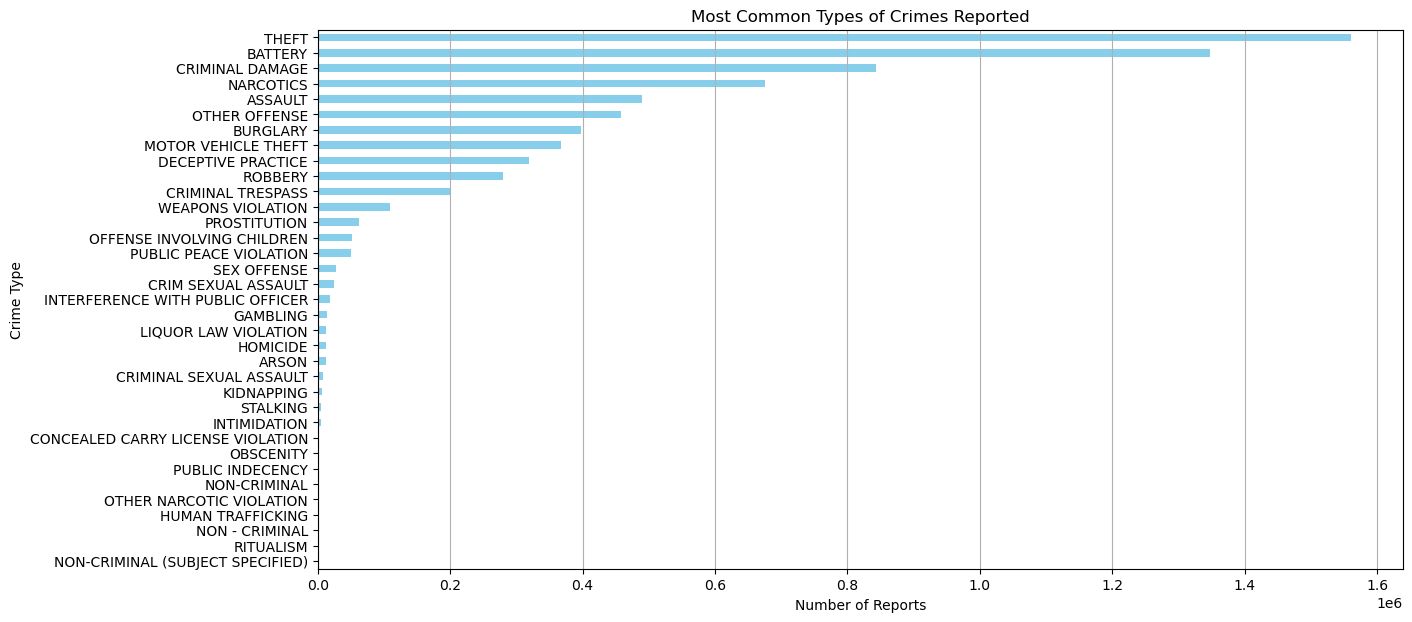

In [28]:
# Group by 'Primary Type' and count the number of crimes
crime_types = df['Primary Type'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(14, 7))
crime_types.plot(kind='barh', color='skyblue')
plt.title('Most Common Types of Crimes Reported')
plt.xlabel('Number of Reports')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

The four most common type of crime reported in Chicago are theft, battery, criminal damage, and narcotics in that order.

#### How do the types of crimes vary by district?

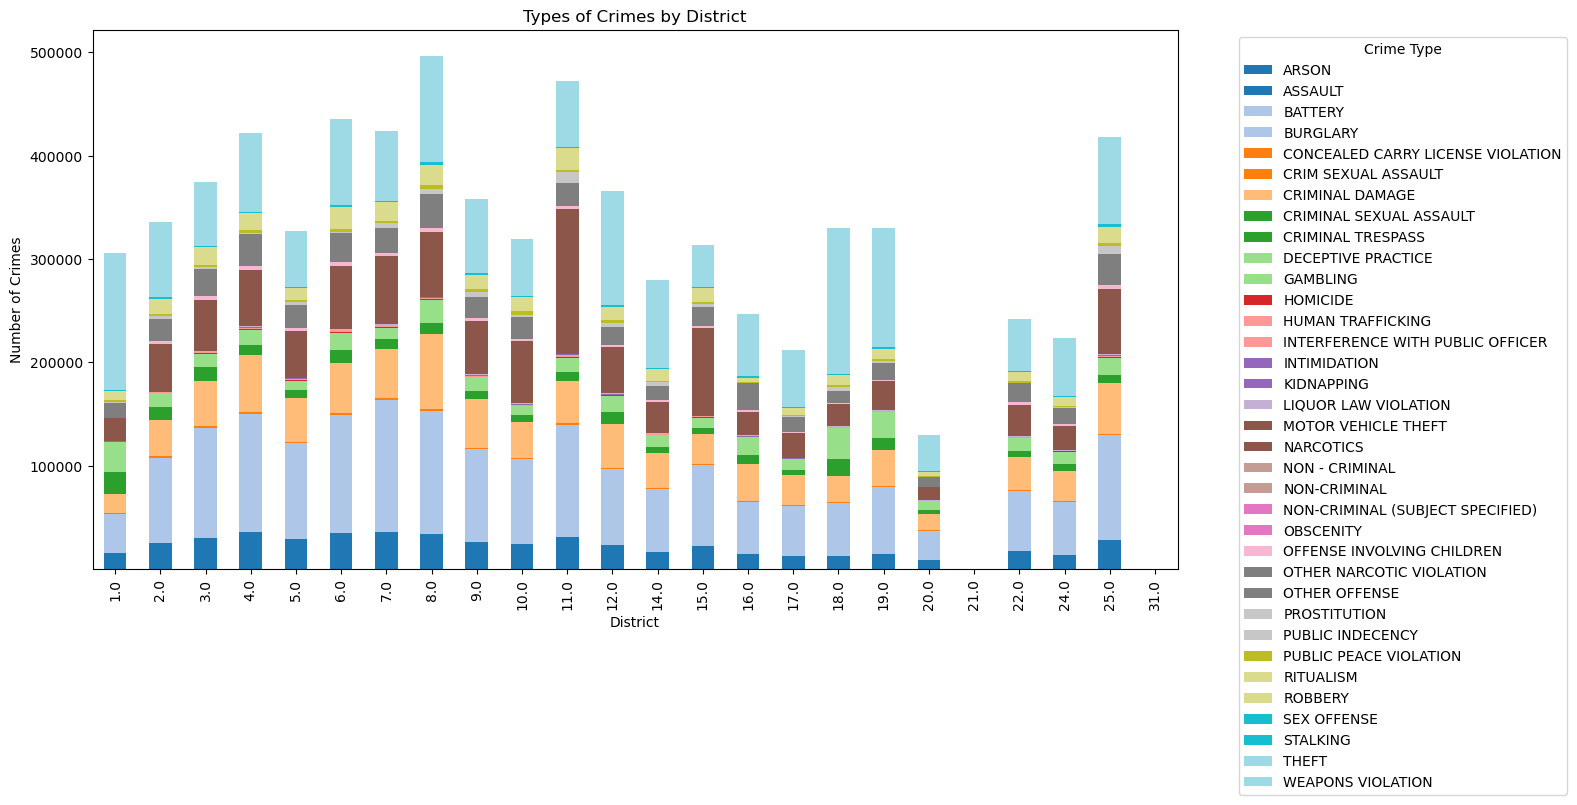

In [29]:
# Group by 'District' and 'Primary Type', and count the occurrences
crime_by_district = df.groupby(['District', 'Primary Type']).size().unstack().fillna(0)

# Plot the stacked bar chart
crime_by_district.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Types of Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### What types of crimes are more likely to result in arrests?

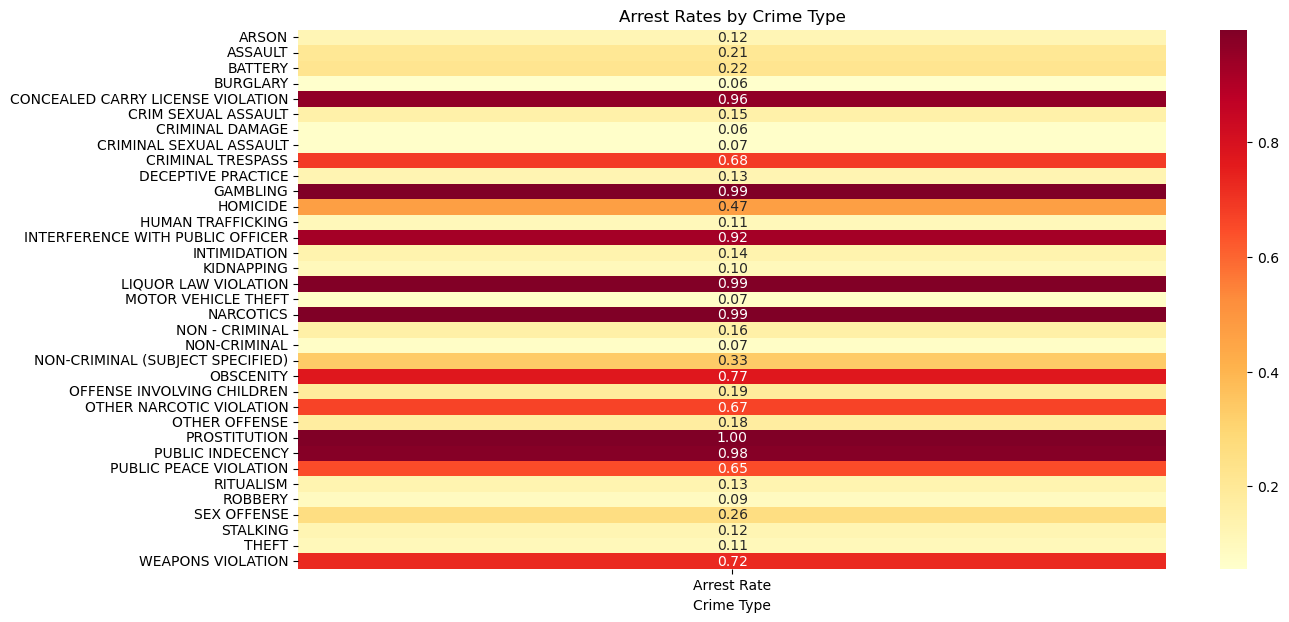

In [30]:
# Group by 'Primary Type' and 'Arrest', and count the occurrences
crime_arrests = df.groupby(['Primary Type', 'Arrest']).size().unstack().fillna(0)

# Calculate arrest rates
crime_arrests['Arrest Rate'] = crime_arrests[True] / (crime_arrests[True] + crime_arrests[False])

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(crime_arrests[['Arrest Rate']], cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Arrest Rates by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('')
plt.show()

Crimes revolving around prostitution, gambling, narcotics, liquor law violation, and public indecency almost always result in an arrest. 
Crimes of burglary, criminal damage, criminal sexual assault, and motor vehicle theft are the least likely to result in an arrest.

#### Are there certain times with significantly higher or lower arrest rates?

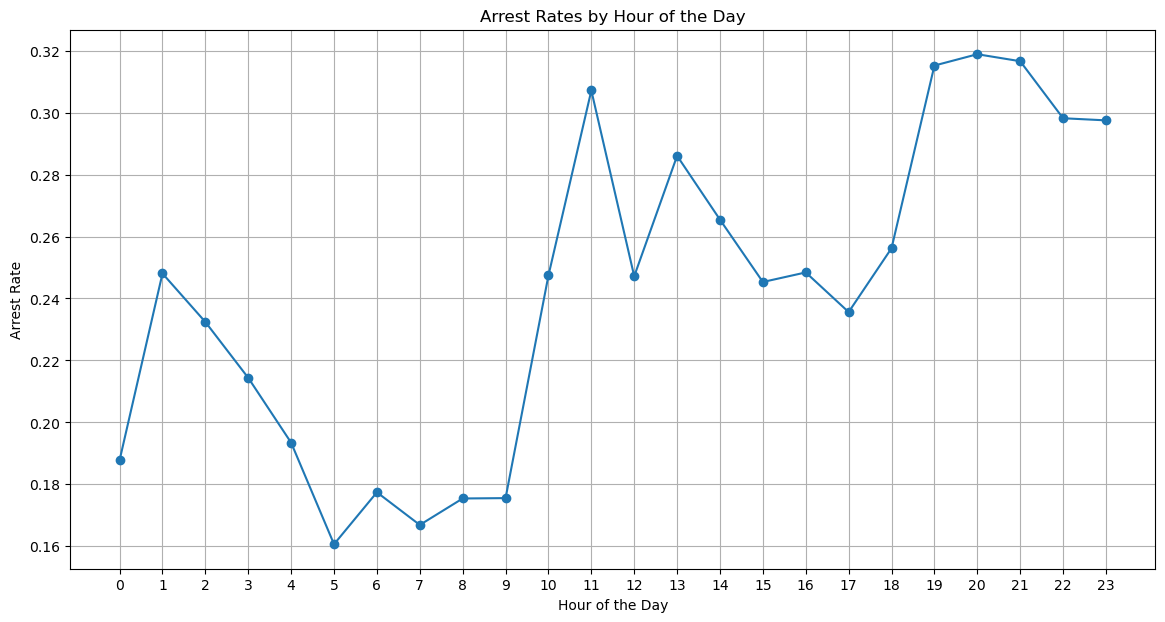

In [32]:
# Extract hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Calculate arrest rates by hour
arrest_rates_by_hour = df.groupby('Hour')['Arrest'].mean()

# Plot the line chart
plt.figure(figsize=(14, 7))
arrest_rates_by_hour.plot(kind='line', marker='o')
plt.title('Arrest Rates by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

The number of arrests for various times of the day is directly proposional to the number of crimes reported during those times of the day.

#### How prevalent are domestic violence incidents in the dataset?

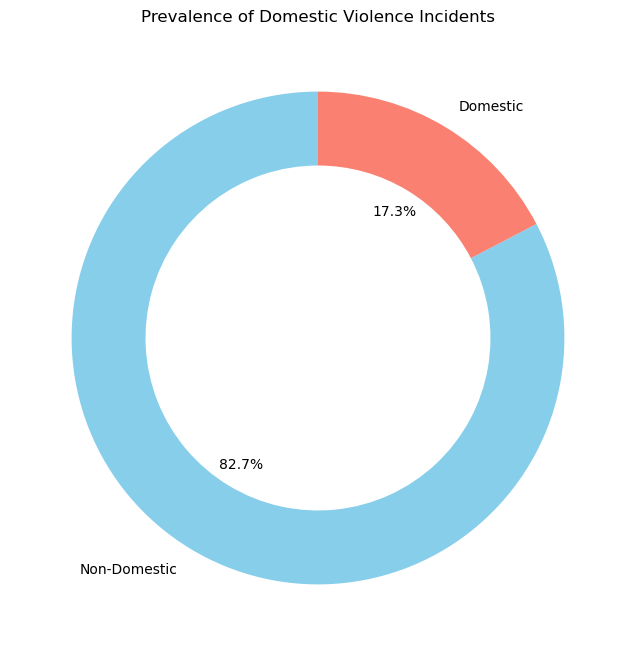

In [33]:
# Calculate the counts of domestic vs non-domestic incidents
domestic_counts = df['Domestic'].value_counts()

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(domestic_counts, labels=['Non-Domestic', 'Domestic'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], wedgeprops=dict(width=0.3))
plt.title('Prevalence of Domestic Violence Incidents')
plt.show()

17% of all crimes reported in Chicago are domestic.

#### Are domestic violence incidents more common in certain areas?

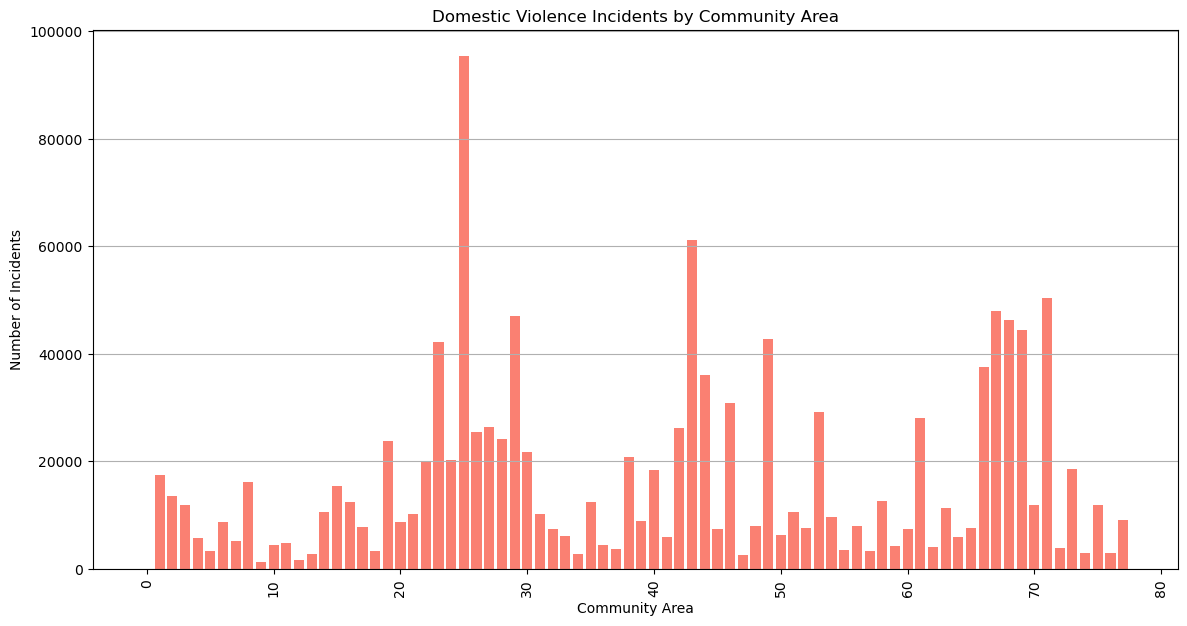

In [34]:
# Filter for domestic violence incidents
domestic_df = df[df['Domestic'] == True]

# Calculate number of domestic incidents by community area
domestic_by_area = domestic_df.groupby('Community Area').size().reset_index(name='Domestic Incidents')

# Plot the bar chart
plt.figure(figsize=(14, 7))
plt.bar(domestic_by_area['Community Area'], domestic_by_area['Domestic Incidents'], color='salmon')
plt.title('Domestic Violence Incidents by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Domestic violence incidents follow the same occurrence pattern as other types of crimes, with Austin and North Shore leading in the number of  
incidents reported.

#### Are domestic violence incidents more common in certain times?

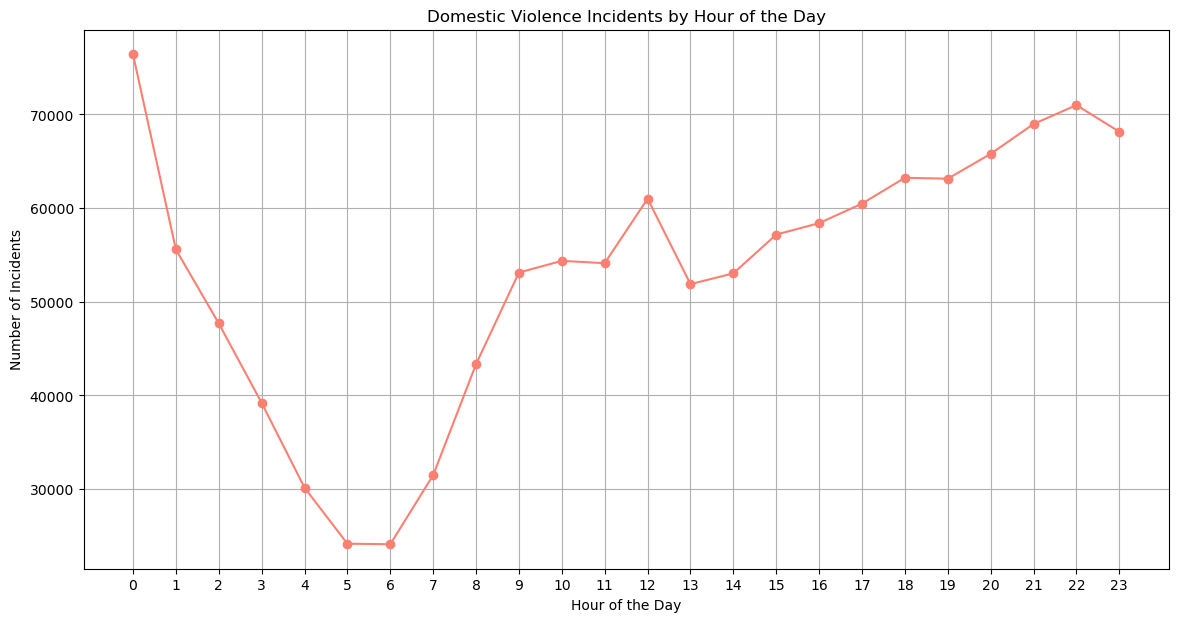

In [35]:
# Filter for domestic violence incidents
domestic_df = df[df['Domestic'] == True].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Extract hour from the 'Date' column
domestic_df.loc[:, 'Hour'] = domestic_df['Date'].dt.hour  # Use .loc to avoid the warning

# Calculate the number of domestic violence incidents by hour
domestic_by_hour = domestic_df.groupby('Hour').size()

# Plot the line chart
plt.figure(figsize=(14, 7))
domestic_by_hour.plot(kind='line', marker='o', color='salmon')
plt.title('Domestic Violence Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

The majority of domestic violence crimes occur between 6pm and midnight.

#### What percentage of domestic violence incidents result in arrests?

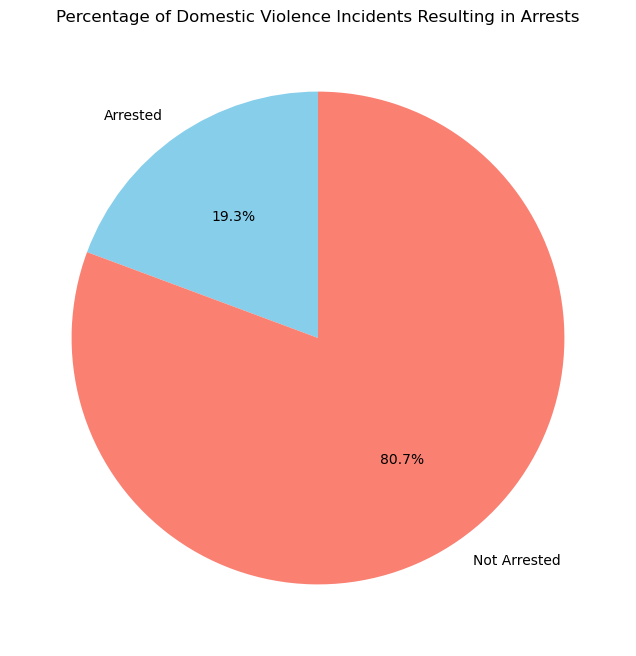

In [36]:
# Calculate the percentage of domestic violence incidents resulting in arrests
arrest_percentage = (domestic_df['Arrest'].mean()) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie([arrest_percentage, 100 - arrest_percentage], labels=['Arrested', 'Not Arrested'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Percentage of Domestic Violence Incidents Resulting in Arrests')
plt.show()

The majority of domestic violence incidents do not result in an arrest. Only 19% of domestic violence crimes reported result in an arrest.

#### How do crimes vary by specific location types?

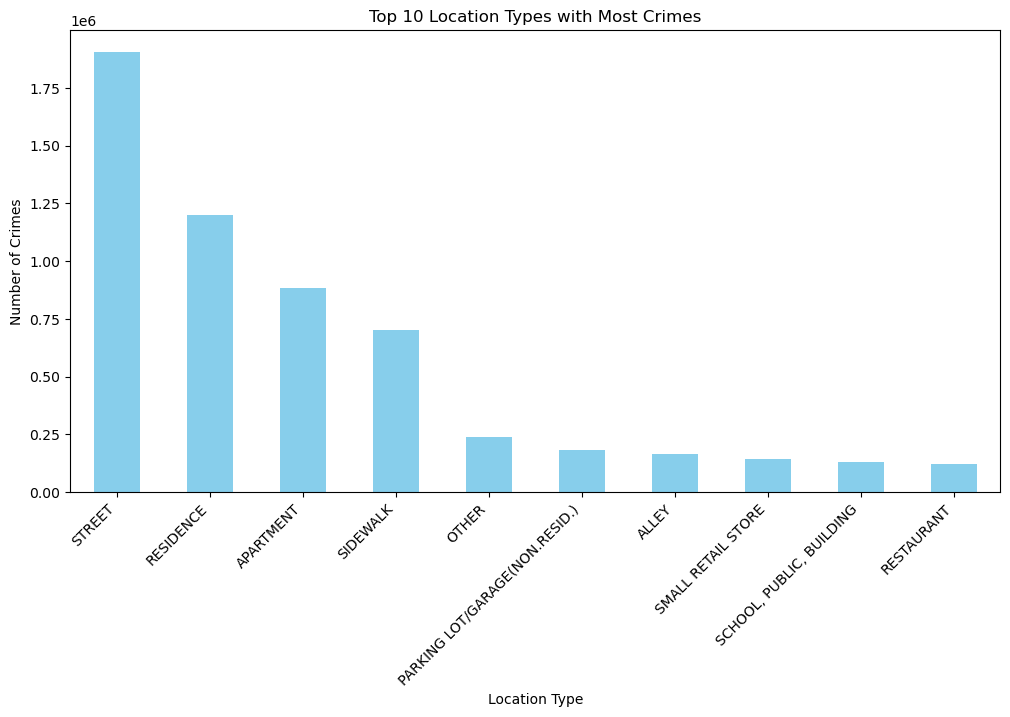

In [37]:
# Group the data by specific location types and count the number of crimes
location_type_counts = df['Location Description'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
location_type_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Location Types with Most Crimes')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

Street locations have the highest crime prevalent rate, followed by residences and apartments.

#### Are there certain location descriptions that are more prone to specific types of crimes?

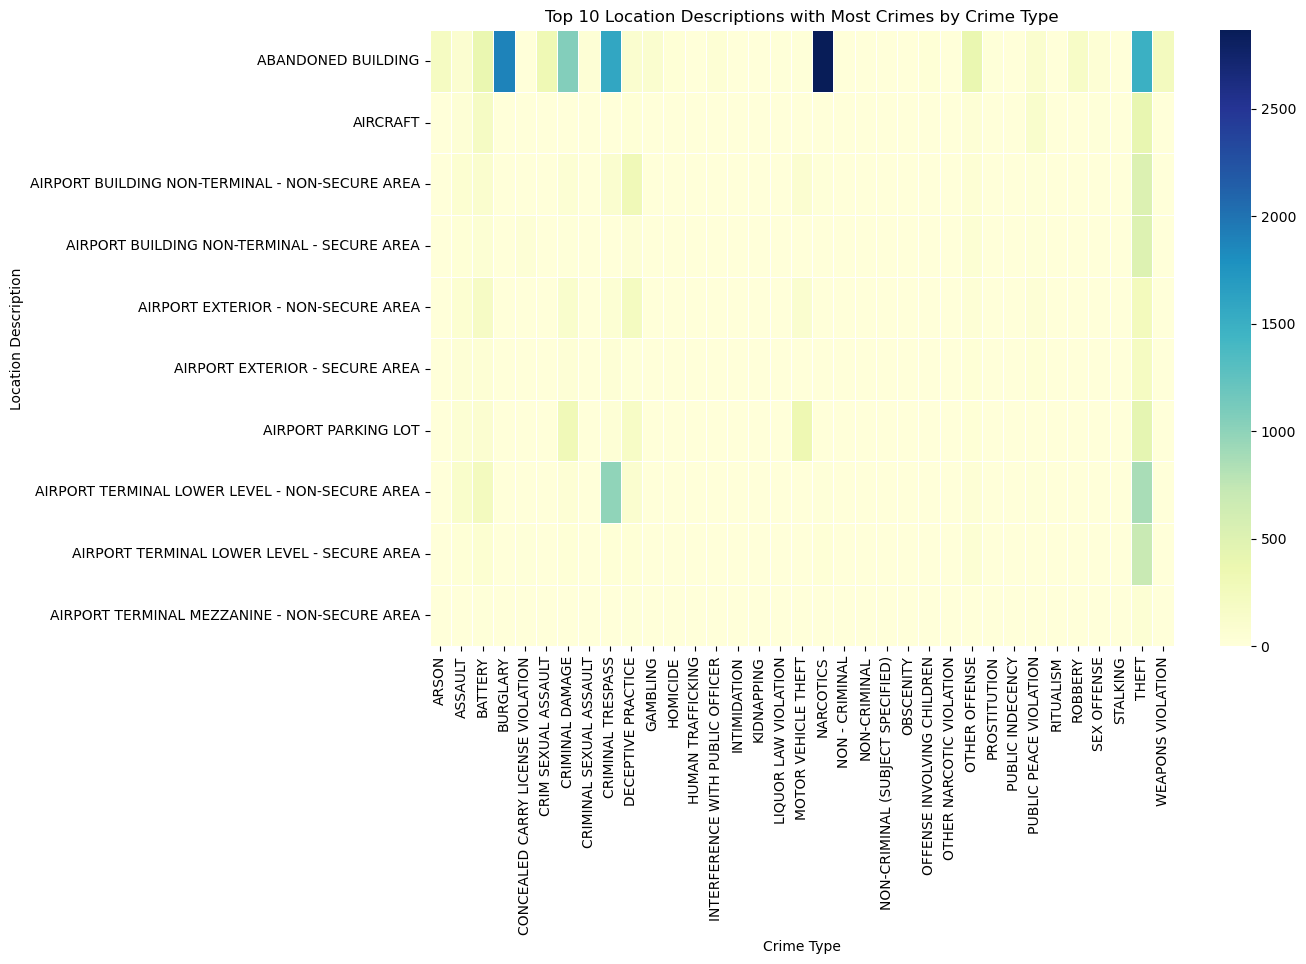

In [38]:
# Group the data by location descriptions and crime types, then count the number of occurrences
crime_location_counts = df.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_location_counts.head(10), cmap='YlGnBu', linewidths=0.5)
plt.title('Top 10 Location Descriptions with Most Crimes by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Location Description')
plt.show()

Abandoned buildings record the highest reported crimes followed by the non-secure area of the lower level at airport terminals

#### How do crime trends compare from year to year?

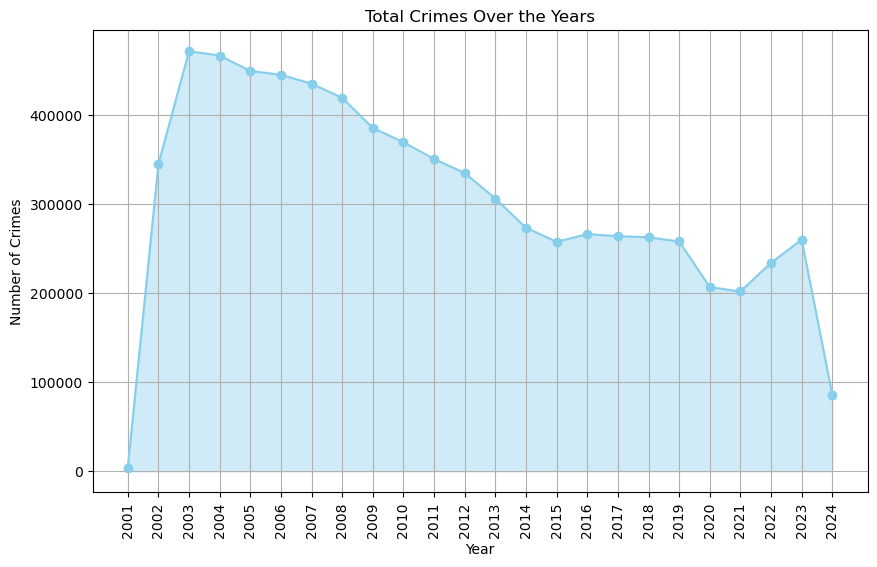

In [39]:
# Group the data by year and count the total number of crimes
crime_counts_by_year = df['Year'].value_counts().sort_index()

# Plot the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(crime_counts_by_year.index, crime_counts_by_year.values, color='skyblue', alpha=0.4)
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, color='skyblue', marker='o')
plt.title('Total Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(crime_counts_by_year.index, rotation=90)
plt.show()

#### Are there significant increases or decreases in certain types of crimes over the years?

<Figure size 1200x600 with 0 Axes>

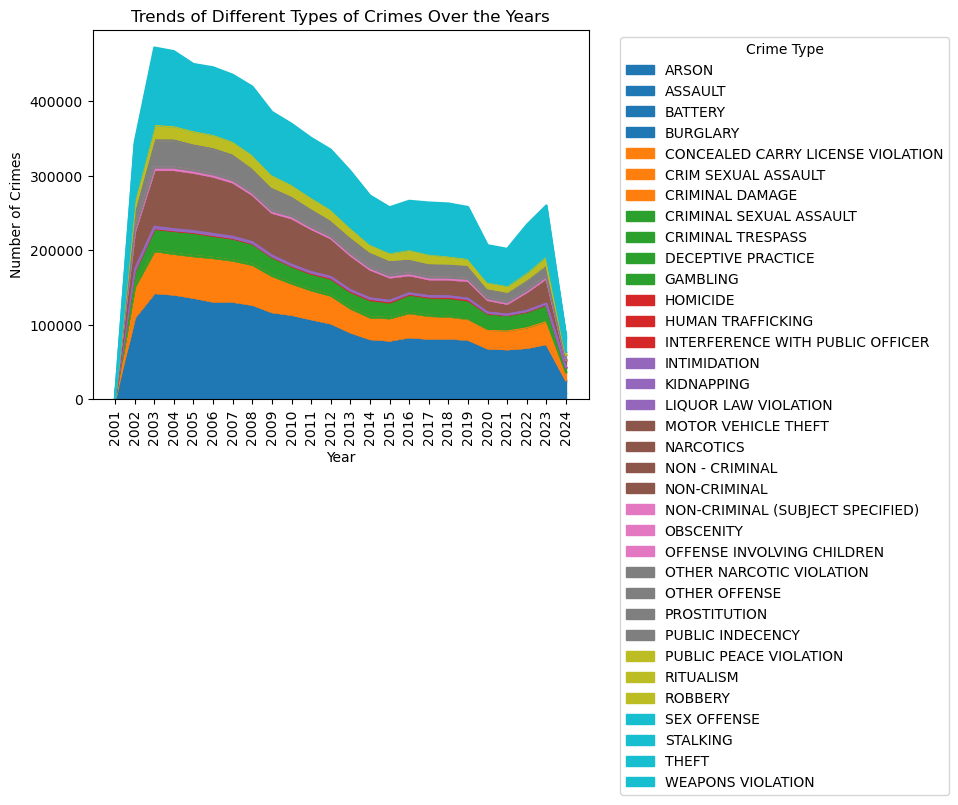

In [40]:
# Group the data by year and crime type, then count the number of occurrences
crime_counts_by_year_type = df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
crime_counts_by_year_type.plot(kind='area', cmap='tab10', stacked=True)
plt.title('Trends of Different Types of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_counts_by_year_type.index, rotation=90)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The general crime trend is similar for all types of crimes in Chicago.

#### Are there any detectable patterns or clusters in the crime data?

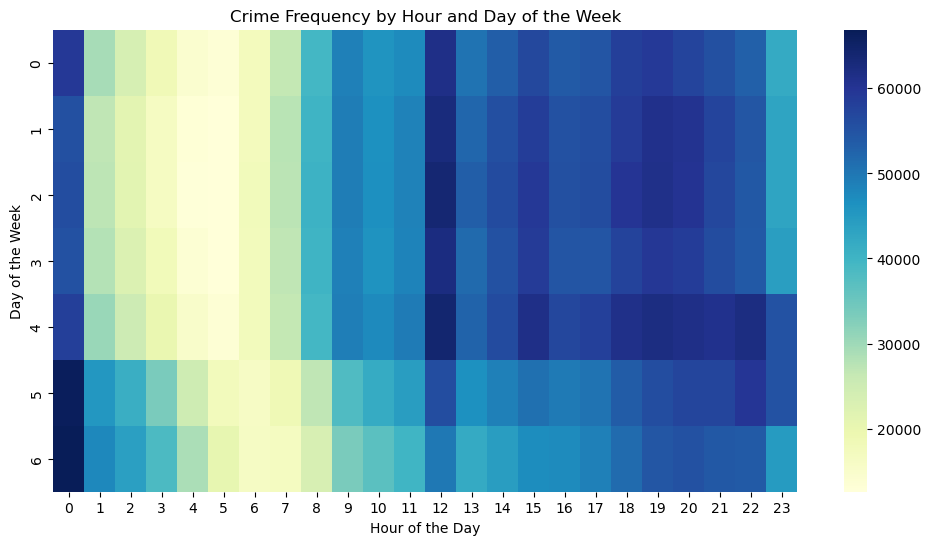

In [41]:
# Extract day of week from the 'Date' column
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a pivot table for crimes by hour and day of the week
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Crime Frequency by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

Most crimes happen on Fridays at midday and between 6pm and midnight.  
Sundays record the least number of crimes for most hours of the day except midnight.

#### Can certain crimes be predicted based on past data and trends?

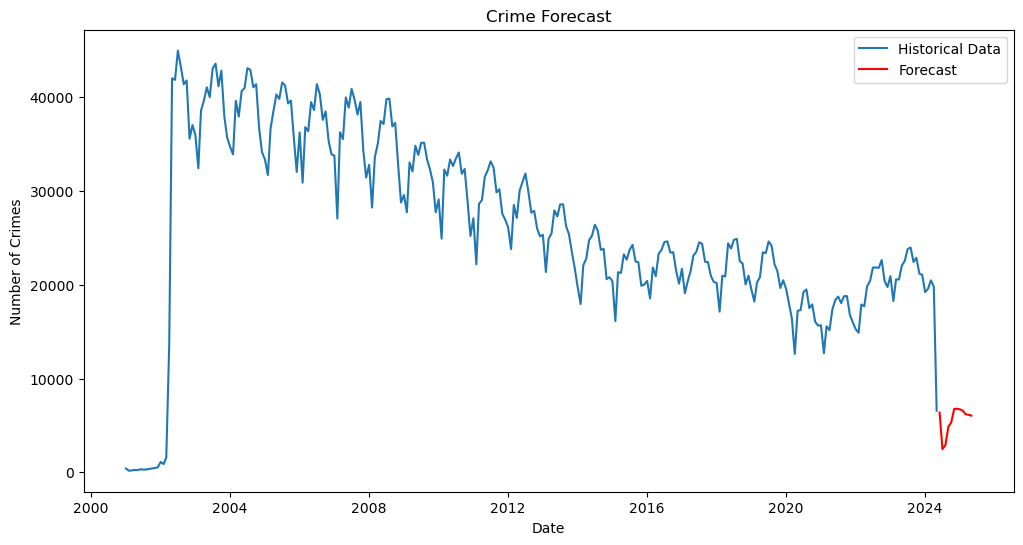

In [56]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate the data by month and count the number of crimes
df['Month'] = df['Date'].dt.to_period('M')
monthly_crimes = df.groupby('Month').size()

# Fit an ARIMA model
model = ARIMA(monthly_crimes, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=12)  # Forecasting for the next 12 months

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_crimes.index.to_timestamp(), monthly_crimes, label='Historical Data')
plt.plot(forecast.index.to_timestamp(), forecast, label='Forecast', color='red')
plt.title('Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

The number of crimes reported in Chicago will likely rise in the next few months before it drops towards the end of the year.

## Recommended Actions

#### Recommendation #1

Enhance patrol schedules and resource allocation by focusing on high-crime periods identified in the analysis, particularly on Fridays and during peak hours. This targeted approach will help in efficiently managing law enforcement resources and reducing crime rates during these critical times.

#### Recommendation #2

Develop and implement district-specific crime prevention strategies, with special attention to high-crime districts such as the 8th District (Chicago Lawn). Tailored strategies can address the unique challenges and crime patterns of each district more effectively.

#### Recommendation #3

Increase support and intervention programs for domestic violence, particularly in high-incidence areas like Austin and North Shore. Collaborating with community organizations and social services can provide comprehensive support to affected individuals and reduce domestic violence rates.

#### Recommendation #4

Utilize the predictive crime model to anticipate and prepare for future crime trends. Implement proactive measures, such as increased patrols and community engagement initiatives, during predicted crime spikes to mitigate potential increases in crime rates.

#### Recommendation #5

Focus on crime hotspot areas identified through geographic analysis for targeted interventions and community policing efforts. Enhanced presence and tailored strategies in these hotspots can significantly reduce crime rates and improve community safety.

#### Recommendation #6

Invest in advanced data analytics and visualization tools to continuously monitor and analyze crime trends. Regular updates and real-time data analysis will enable more responsive and adaptive law enforcement strategies, ensuring ongoing effectiveness in crime prevention.

#### Recommendation #7

Engage in community outreach and education programs to raise awareness about crime prevention and safety measures. Building strong community relationships can enhance cooperation with law enforcement and foster a safer environment for all residents.

## Conclusion

This data analysis project has yielded invaluable insights that hold significant potential to influence strategic decision-making and optimization efforts within Chicago's law enforcement and community safety initiatives. Through a meticulous examination of various crime attributes, including temporal patterns, geographic hotspots, and specific crime types, we have acquired a deeper understanding of crime dynamics and emerging trends.

The findings emphasize the necessity of adapting our law enforcement strategies, resource allocation, and community engagement efforts to align with identified crime patterns and high-risk areas. Implementing these recommendations and adopting a proactive approach to crime prevention and public safety will help us become more effective in reducing crime rates and enhancing community well-being. This positions us for improved public safety outcomes and long-term success in creating a safer environment for all residents of Chicago.